In [1]:
# Data processing
import pandas as pd
import numpy as np

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Machine learning 
from sklearn.ensemble import RandomForestClassifier

# Evaluating Performance
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve, average_precision_score

# Visualisation
import matplotlib.pyplot as plt
%matplotlib inline

source_csv = '/home/work/GitHub/data/churn_prediction/usr_with_tch_complete.csv'

In [2]:
# Reading the dataframe 
df = pd.read_csv(source_csv)

# Remove users who didn't have any activity in month 0
min_months = df.groupby('user_id')['event_leg'].min()
min_months = min_months[min_months == 0]

# Update the dataframe
df = df.set_index('user_id').loc[min_months.index]

# Show the first 5 rows
df.head()

,event_leg,grp_add_assig,grp_add_assig_tot,grp_add_user,grp_add_user_tot,grp_added,play_video,q_lvl_0,q_lvl_0_cor,q_lvl_1,...,tch_add_user_tot,tch_added,tch_attempt,tch_attempt_tot,tch_create_group,tch_create_group_tot,tch_view_assig_prog,tch_view_assig_prog_tot,view_concept,view_hint
user_id,,,,,,,,,,,,,,,,,,,,,
0009111939b7d071597369a67002b22853c08e19f463cf225f985d51a28c00e0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,321.0,137.0,4.0,...,109.0,1.0,13.0,59.0,0.0,0.0,36.0,58.0,3.0,5.0
0009111939b7d071597369a67002b22853c08e19f463cf225f985d51a28c00e0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,30.0,0.0,...,110.0,0.0,14.0,73.0,1.0,1.0,19.0,77.0,3.0,0.0
0009111939b7d071597369a67002b22853c08e19f463cf225f985d51a28c00e0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,108.0,44.0,0.0,...,110.0,0.0,2.0,75.0,0.0,1.0,4.0,81.0,0.0,0.0
0009111939b7d071597369a67002b22853c08e19f463cf225f985d51a28c00e0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,11.0,0.0,...,110.0,0.0,0.0,75.0,0.0,1.0,2.0,83.0,0.0,0.0
0009111939b7d071597369a67002b22853c08e19f463cf225f985d51a28c00e0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,11.0,0.0,...,110.0,0.0,4.0,79.0,0.0,1.0,4.0,87.0,1.0,0.0


## Saving the classifier for each month

Here for each month, we save the classifier. 

5110
5110


(array([ 4853.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   257.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

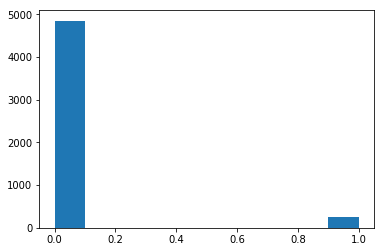

In [43]:
# Find the churn month of each user
churn_array = df.groupby('user_id')['event_leg'].max()

# Define last_month of user activity
last_month = 3

# Adapt churn_array appropriately 
churn_array = churn_array[churn_array>=last_month]

# Remove all rows that have data after those months
df_lm = df[df['event_leg']<=last_month]

# Remove all users that have already churned
df_lm = df_lm.loc[churn_array.index]

# Create labels for churn and not churn
label = [0 if item > last_month else 1 for item in churn_array]

# Checking the lengths (they have to be the same)
print(len(label))
print(len(np.unique(df_lm.index)))


# Check class distribution
plt.hist(label)

In [44]:
# Now we can choose how to inorporate the timeseries data
# 1) Just sum over all instances
# 2) Put them as additional features
# 3) What else?

# Here we add a function that does this

def prepare_time_series(df, month_array, type_operation, groupby_feature = 'user_id'):
    
    # If we want to append each month as a seperate feature 
    if type_operation == 'append':
        
        # Find the months of interest
        df_new = df[df.index.get_level_values(1).isin(month_array)].unstack().fillna(0)
        
        # Name new columns
        new_cols = [str(item[0]) + '_' + str(int(item[1])) for item in df_new.columns]
        
        # Drop level and rename
        df_new.columns = df_new.columns.droplevel(0)
        df_new.columns = new_cols
    
    # If we want to sum the values of each feature for every month
    elif type_operation == 'sum':
        df_new = df[df.index.get_level_values(1).isin(month_array)]
        df_new = df_new.reset_index().groupby(groupby_feature).sum()
    
    return df_new

# Let's try appending the features
features_choice = ['q_lvl_0','tch_view_assig_prog','tch_add_user','tch_add_assig_tot','tch_view_assig_prog_tot','tch_attempt_tot',
                  'tch_add_user_tot','grp_added']

df_lm_new = prepare_time_series(df_lm.groupby(['user_id','event_leg']).sum()[features_choice],list(range(last_month+1)),'append')

df_lm_new.head()

,q_lvl_0_0,q_lvl_0_1,q_lvl_0_2,q_lvl_0_3,tch_view_assig_prog_0,tch_view_assig_prog_1,tch_view_assig_prog_2,tch_view_assig_prog_3,tch_add_user_0,tch_add_user_1,...,tch_attempt_tot_2,tch_attempt_tot_3,tch_add_user_tot_0,tch_add_user_tot_1,tch_add_user_tot_2,tch_add_user_tot_3,grp_added_0,grp_added_1,grp_added_2,grp_added_3
user_id,,,,,,,,,,,,,,,,,,,,,
0009111939b7d071597369a67002b22853c08e19f463cf225f985d51a28c00e0,321.0,50.0,108.0,34.0,36.0,19.0,4.0,2.0,38.0,1.0,...,75.0,75.0,109.0,110.0,110.0,110.0,0.0,0.0,0.0,0.0
001209cc56f8583d638502e7446dd7461278082d613d4c6d718b5b3fb6d87a72,348.0,11.0,0.0,0.0,66.0,0.0,4.0,0.0,13.0,0.0,...,489.0,0.0,55.0,55.0,55.0,0.0,2.0,0.0,0.0,0.0
001ed4483f258c0e1b75a205f24f7ec2b04490adbddb45eb9bcdb91d1ff1e9be,0.0,64.0,108.0,104.0,92.0,28.0,96.0,20.0,70.0,0.0,...,722.0,746.0,226.0,226.0,280.0,280.0,28.0,0.0,40.0,0.0
00310c09b913aa7e422aa50306010d12a23ad40d63eac99e37931f0448c131df,0.0,2.0,61.0,13.0,0.0,0.0,1.0,13.0,6.0,1.0,...,128.0,142.0,50.0,51.0,61.0,61.0,6.0,1.0,10.0,0.0
003136aacdfb6e7ee06bdd001b8c5351ddb3ad360c30bcac094c645f4f1cec68,19.0,39.0,16.0,0.0,275.0,109.0,91.0,103.0,219.0,3.0,...,93.0,93.0,314.0,317.0,318.0,318.0,0.0,0.0,0.0,0.0


(array([ 1453.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,    80.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

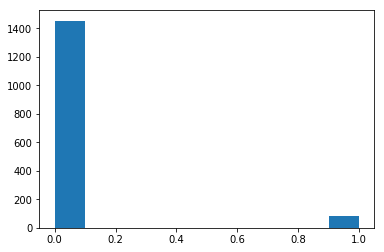

In [65]:
# Fill in any zeros
df_lm_new = df_lm_new.fillna(0)

# Assign data to auxillary variables
X = df_lm_new
y = label

# Storing the keys
store_keys = X.keys()

# Scale the data
scaler = StandardScaler()
X_trf = scaler.fit_transform(X)
X = X_trf

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3,random_state=42)

plt.hist(y_test)

             precision    recall  f1-score   support

          0       0.99      0.96      0.98      1500
          1       0.26      0.64      0.37        33

avg / total       0.98      0.95      0.96      1533



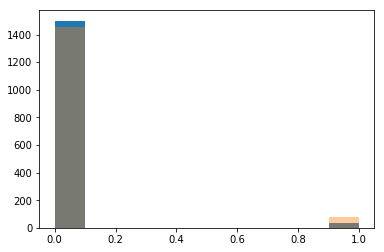

In [68]:
# Train an ML model

clf = RandomForestClassifier(n_estimators=100,random_state=42)
clf.fit(X_train,y_train)

# Predict
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)

# Evaluate
plt.hist(y_pred)
plt.hist(y_test,alpha= 0.4)

print(classification_report(y_pred,y_test))


0.63636363636363635

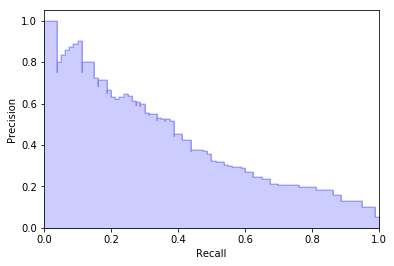

In [69]:
precision, recall, _ = precision_recall_curve(y_test,y_score[:,1])


plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

precision_score(y_test,y_pred)


In [48]:
# Saving the model in pickle format
import pickle

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X,y)

pickle.dump(clf, open('Month_'+str(last_month)+'_prediction.model', 'wb'))


## Autoregression

Here we add another feature that calculates for each given month the likelihood that the user has churned.

5110
5110


(array([ 4853.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   257.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

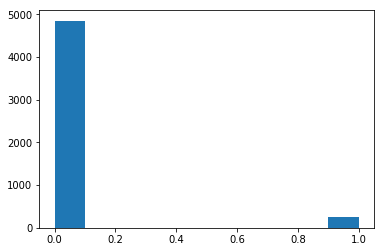

In [71]:
# Find the churn month of each user
churn_array = df.groupby('user_id')['event_leg'].max()

# Define last_month of user activity
last_month = 3

# Adapt churn_array appropriately 
churn_array = churn_array[churn_array>=last_month]

# Remove all rows that have data after those months
df_lm = df[df['event_leg']<=last_month]

# Remove all users that have already churned
df_lm = df_lm.loc[churn_array.index]

# Create labels for churn and not churn
label = [0 if item > last_month else 1 for item in churn_array]

# Checking the lengths (they have to be the same)
print(len(label))
print(len(np.unique(df_lm.index)))


# Check class distribution
plt.hist(label)

In [72]:
# Let's try appending the features
df_lm_new = prepare_time_series(df_lm.groupby(['user_id','event_leg']).sum()[features_choice],list(range(last_month+1)),'append')

# Fill in any zeros
df_lm_new = df_lm_new.fillna(0)

df_lm_new.head()

,q_lvl_0_0,q_lvl_0_1,q_lvl_0_2,q_lvl_0_3,tch_view_assig_prog_0,tch_view_assig_prog_1,tch_view_assig_prog_2,tch_view_assig_prog_3,tch_add_user_0,tch_add_user_1,...,tch_attempt_tot_2,tch_attempt_tot_3,tch_add_user_tot_0,tch_add_user_tot_1,tch_add_user_tot_2,tch_add_user_tot_3,grp_added_0,grp_added_1,grp_added_2,grp_added_3
user_id,,,,,,,,,,,,,,,,,,,,,
0009111939b7d071597369a67002b22853c08e19f463cf225f985d51a28c00e0,321.0,50.0,108.0,34.0,36.0,19.0,4.0,2.0,38.0,1.0,...,75.0,75.0,109.0,110.0,110.0,110.0,0.0,0.0,0.0,0.0
001209cc56f8583d638502e7446dd7461278082d613d4c6d718b5b3fb6d87a72,348.0,11.0,0.0,0.0,66.0,0.0,4.0,0.0,13.0,0.0,...,489.0,0.0,55.0,55.0,55.0,0.0,2.0,0.0,0.0,0.0
001ed4483f258c0e1b75a205f24f7ec2b04490adbddb45eb9bcdb91d1ff1e9be,0.0,64.0,108.0,104.0,92.0,28.0,96.0,20.0,70.0,0.0,...,722.0,746.0,226.0,226.0,280.0,280.0,28.0,0.0,40.0,0.0
00310c09b913aa7e422aa50306010d12a23ad40d63eac99e37931f0448c131df,0.0,2.0,61.0,13.0,0.0,0.0,1.0,13.0,6.0,1.0,...,128.0,142.0,50.0,51.0,61.0,61.0,6.0,1.0,10.0,0.0
003136aacdfb6e7ee06bdd001b8c5351ddb3ad360c30bcac094c645f4f1cec68,19.0,39.0,16.0,0.0,275.0,109.0,91.0,103.0,219.0,3.0,...,93.0,93.0,314.0,317.0,318.0,318.0,0.0,0.0,0.0,0.0


In [73]:
# Load the previous months classifiers

clf_0 = pickle.load(open('Month_0_prediction.model', 'rb'))
clf_1 = pickle.load(open('Month_1_prediction.model', 'rb'))
clf_2 = pickle.load(open('Month_2_prediction.model', 'rb'))

In [74]:
# Check the probability of the user leaving in that given month


## Scaling
scaler = StandardScaler()

X_0 = scaler.fit_transform(df_lm_new.filter(regex='_0$'))
X_1 = scaler.fit_transform(df_lm_new.filter(regex='_0$|_1$'))
X_2 = scaler.fit_transform(df_lm_new.filter(regex='_0$|_1$|_2$'))

## Calculating probability
prob_0 = clf_0.predict_proba(X_0)[:,1]
prob_1 = clf_1.predict_proba(X_1)[:,1]
prob_2 = clf_2.predict_proba(X_2)[:,1]


## Adding probabilities to dataframe
df_lm_add = df_lm_new

df_lm_add['Prob_0'] = prob_0
df_lm_add['Prob_1'] = prob_1
df_lm_add['Prob_2'] = prob_2



df_lm_add.head()


,q_lvl_0_0,q_lvl_0_1,q_lvl_0_2,q_lvl_0_3,tch_view_assig_prog_0,tch_view_assig_prog_1,tch_view_assig_prog_2,tch_view_assig_prog_3,tch_add_user_0,tch_add_user_1,...,tch_add_user_tot_1,tch_add_user_tot_2,tch_add_user_tot_3,grp_added_0,grp_added_1,grp_added_2,grp_added_3,Prob_0,Prob_1,Prob_2
user_id,,,,,,,,,,,,,,,,,,,,,
0009111939b7d071597369a67002b22853c08e19f463cf225f985d51a28c00e0,321.0,50.0,108.0,34.0,36.0,19.0,4.0,2.0,38.0,1.0,...,110.0,110.0,110.0,0.0,0.0,0.0,0.0,0.170000,0.11,0.03
001209cc56f8583d638502e7446dd7461278082d613d4c6d718b5b3fb6d87a72,348.0,11.0,0.0,0.0,66.0,0.0,4.0,0.0,13.0,0.0,...,55.0,55.0,0.0,2.0,0.0,0.0,0.0,0.110000,0.12,0.05
001ed4483f258c0e1b75a205f24f7ec2b04490adbddb45eb9bcdb91d1ff1e9be,0.0,64.0,108.0,104.0,92.0,28.0,96.0,20.0,70.0,0.0,...,226.0,280.0,280.0,28.0,0.0,40.0,0.0,0.040000,0.01,0.03
00310c09b913aa7e422aa50306010d12a23ad40d63eac99e37931f0448c131df,0.0,2.0,61.0,13.0,0.0,0.0,1.0,13.0,6.0,1.0,...,51.0,61.0,61.0,6.0,1.0,10.0,0.0,0.493333,0.19,0.20
003136aacdfb6e7ee06bdd001b8c5351ddb3ad360c30bcac094c645f4f1cec68,19.0,39.0,16.0,0.0,275.0,109.0,91.0,103.0,219.0,3.0,...,317.0,318.0,318.0,0.0,0.0,0.0,0.0,0.266167,0.18,0.18


In [75]:


# Assign data to auxillary variables
X = df_lm_add
y = label

# Storing the keys
store_keys = X.keys()

# Scale the data
scaler = StandardScaler()
X_trf = scaler.fit_transform(X)
X = X_trf

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3,random_state=42)

             precision    recall  f1-score   support

          0       0.99      0.96      0.98      1506
          1       0.24      0.70      0.36        27

avg / total       0.98      0.95      0.97      1533



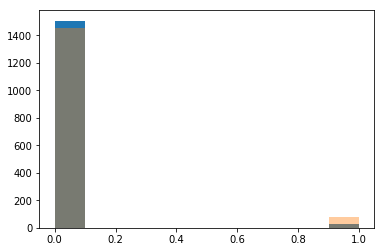

In [76]:
# Train an ML model

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

# Predict
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)

# Evaluate
plt.hist(y_pred)
plt.hist(y_test,alpha= 0.4)

print(classification_report(y_pred,y_test))


0.43627615158011446

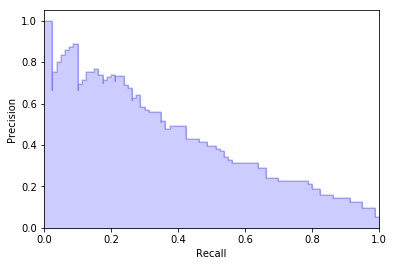

In [77]:
precision, recall, _ = precision_recall_curve(y_test,y_score[:,1])


plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

average_precision_score(y_test,y_score[:,1])

In [42]:
# Output feature importance

def return_feature_importance(X,y,keys,n_estimators = 100):

    # Using the random forest classifier, find out what are the main features that predict whether a user is likely to churn or not
    randomForest = RandomForestClassifier(n_estimators)
    randomForest.fit(X,y)
    
    importances = randomForest.feature_importances_
    
    indices = np.argsort(importances)[::-1]
    
    # Print the feature ranking
    print("Feature ranking:")
    
    for f in range(X.shape[1]):
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]),keys[indices[f]])

return_feature_importance(X,y,store_keys)

Feature ranking:
1. feature 0 (0.075238) q_lvl_0_0
2. feature 8 (0.074385) tch_add_user_0
3. feature 3 (0.054892) q_lvl_0_3
4. feature 2 (0.053060) q_lvl_0_2
5. feature 1 (0.047693) q_lvl_0_1
6. feature 28 (0.044720) grp_added_0
7. feature 15 (0.043408) tch_add_assig_tot_3
8. feature 19 (0.041404) tch_view_assig_prog_tot_3
9. feature 4 (0.038278) tch_view_assig_prog_0
10. feature 27 (0.035949) tch_add_user_tot_3
11. feature 12 (0.032345) tch_add_assig_tot_0
12. feature 23 (0.030661) tch_attempt_tot_3
13. feature 13 (0.029803) tch_add_assig_tot_1
14. feature 16 (0.029786) tch_view_assig_prog_tot_0
15. feature 17 (0.029041) tch_view_assig_prog_tot_1
16. feature 6 (0.027441) tch_view_assig_prog_2
17. feature 14 (0.027411) tch_add_assig_tot_2
18. feature 24 (0.026968) tch_add_user_tot_0
19. feature 18 (0.026382) tch_view_assig_prog_tot_2
20. feature 20 (0.025698) tch_attempt_tot_0
21. feature 26 (0.025650) tch_add_user_tot_2
22. feature 25 (0.024652) tch_add_user_tot_1
23. feature 7 (0.024